### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Listado de tiendas como dataset para iteraciones
tiendas = [tienda1, tienda2, tienda3, tienda4]
lista_ventas_tienda = []

# Calculo de ventas totales por cada tienda
for index, tienda in enumerate(tiendas):
  venta_tienda = list(tienda['Precio'])
  lista_ventas_tienda.append(sum(venta_tienda))
  print(f'\n---- Tienda {index + 1} ----')
  print(f'Ventas totales: {lista_ventas_tienda[-1]}')


---- Tienda 1 ----
Ventas totales: 1150880400.0

---- Tienda 2 ----
Ventas totales: 1116343500.0

---- Tienda 3 ----
Ventas totales: 1098019600.0

---- Tienda 4 ----
Ventas totales: 1038375700.0


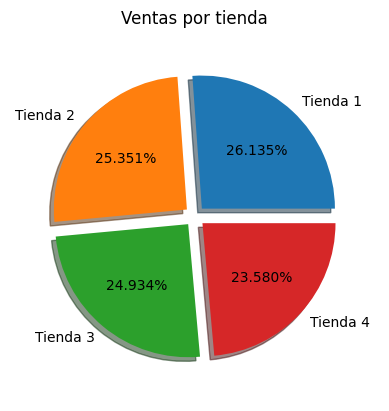

In [56]:
# Grafica Pie
import matplotlib.pyplot as plt

nombre_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.pie(
    x = lista_ventas_tienda,
    labels = nombre_tiendas,
    autopct='%1.3f%%',
    shadow = True,
    radius = 0.9,
    explode = [0.07, 0.07, 0.07, 0.07])
plt.title('Ventas por tienda')
plt.show()

In [4]:
# Calculo de ventas totales por cada tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]
ventas_tiendas = []

print('---- Ventas totales por tienda ----')
for index, tienda in enumerate(tiendas):
  ventas_tiendas.append((f'tienda{index + 1}', float(tienda['Precio'].sum())))
  print(f"Tienda {index + 1}: {tienda['Precio'].sum()}")
print(f'\n{ventas_tiendas}')

---- Ventas totales por tienda ----
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0

[('tienda1', 1150880400.0), ('tienda2', 1116343500.0), ('tienda3', 1098019600.0), ('tienda4', 1038375700.0)]


# 2. Ventas por categoría

In [5]:
# Obtener lista de categorias de productos en todas las tiendas
categorias = set()
for tienda in tiendas:
  categorias.update(tienda['Categoría del Producto'])

# Calcular la cantidad de productos vendidos por categoria
dict_ventas_cat = {}
for index, tienda in enumerate(tiendas):
  lista_categ = list(tienda['Categoría del Producto'])
  cat_cantidad = []

  print(f'\n---- Tienda {index + 1} ----')

  for cat in categorias:
    count = 0
    for i in range(len(lista_categ)):
      if lista_categ[i] == cat:
        count += 1
    print(f'{cat}: {count} unidadaes')
    cat_cantidad.append((cat, count))
  dict_ventas_cat[nombre_tiendas[index]] = cat_cantidad


---- Tienda 1 ----
Juguetes: 324 unidadaes
Electrónicos: 448 unidadaes
Instrumentos musicales: 182 unidadaes
Artículos para el hogar: 171 unidadaes
Libros: 173 unidadaes
Muebles: 465 unidadaes
Electrodomésticos: 312 unidadaes
Deportes y diversión: 284 unidadaes

---- Tienda 2 ----
Juguetes: 313 unidadaes
Electrónicos: 422 unidadaes
Instrumentos musicales: 224 unidadaes
Artículos para el hogar: 181 unidadaes
Libros: 197 unidadaes
Muebles: 442 unidadaes
Electrodomésticos: 305 unidadaes
Deportes y diversión: 275 unidadaes

---- Tienda 3 ----
Juguetes: 315 unidadaes
Electrónicos: 451 unidadaes
Instrumentos musicales: 177 unidadaes
Artículos para el hogar: 177 unidadaes
Libros: 185 unidadaes
Muebles: 499 unidadaes
Electrodomésticos: 278 unidadaes
Deportes y diversión: 277 unidadaes

---- Tienda 4 ----
Juguetes: 338 unidadaes
Electrónicos: 451 unidadaes
Instrumentos musicales: 170 unidadaes
Artículos para el hogar: 201 unidadaes
Libros: 187 unidadaes
Muebles: 480 unidadaes
Electrodomésticos

In [44]:
def sep_grafica(diccionario):
  categ = []
  conteo_cat = []

  fig, axs = plt.subplots(2, 2, figsize=(16, 8))
  axs = axs.flatten()
  for i, (key, value) in enumerate(diccionario.items()):
    for tup in value:
      for index, e in enumerate(tup):
        if index % 2 == 0:
          categ.append(e)
        else:
          conteo_cat.append(e)
    axs[i].barh(width = conteo_cat, y = categ)
    axs[i].set_title(f'Ventas por categoria en {key}')
    axs[i].set_xlabel('Cantidad')
    axs[i].set_ylabel('Categoría')

  plt.tight_layout()
  plt.show()

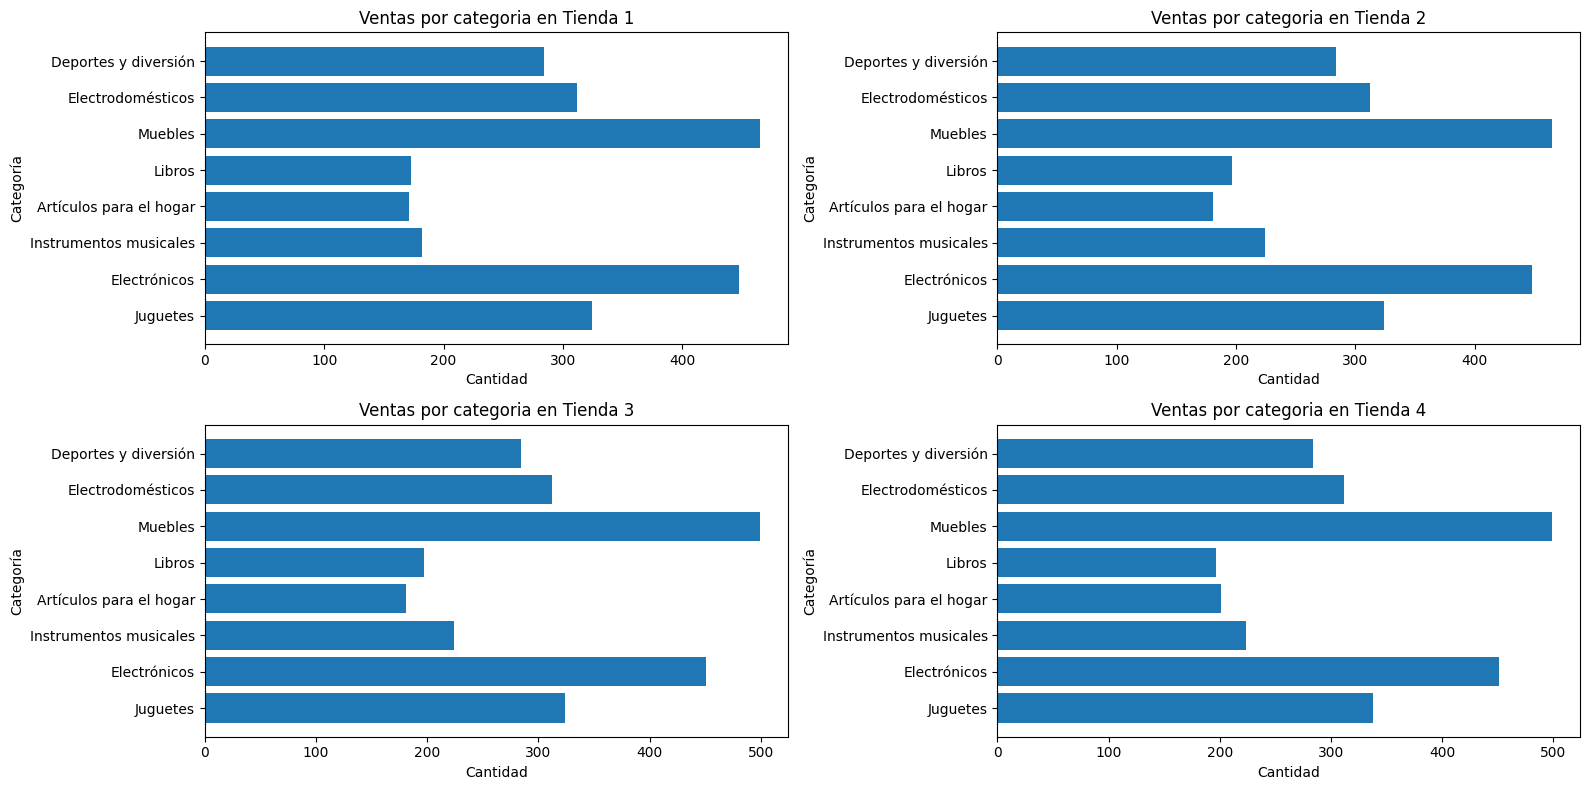

In [45]:
sep_grafica(dict_ventas_cat)

In [8]:
# Calcular la cantidad de ventas por categoria y tienda
print('\n---- Ventas de productos por categorias y tienda ----')
for index, tienda in enumerate(tiendas):
  print(f'Tienda {index + 1}:')
  categorias_ordenadas = list(sorted(tienda['Categoría del Producto'].unique()))
  for cat in categorias_ordenadas:
    print(f'\t{cat}: {tienda[tienda["Categoría del Producto"] == cat]["Precio"].count()}')


---- Ventas de productos por categorias y tienda ----
Tienda 1:
	Artículos para el hogar: 171
	Deportes y diversión: 284
	Electrodomésticos: 312
	Electrónicos: 448
	Instrumentos musicales: 182
	Juguetes: 324
	Libros: 173
	Muebles: 465
Tienda 2:
	Artículos para el hogar: 181
	Deportes y diversión: 275
	Electrodomésticos: 305
	Electrónicos: 422
	Instrumentos musicales: 224
	Juguetes: 313
	Libros: 197
	Muebles: 442
Tienda 3:
	Artículos para el hogar: 177
	Deportes y diversión: 277
	Electrodomésticos: 278
	Electrónicos: 451
	Instrumentos musicales: 177
	Juguetes: 315
	Libros: 185
	Muebles: 499
Tienda 4:
	Artículos para el hogar: 201
	Deportes y diversión: 277
	Electrodomésticos: 254
	Electrónicos: 451
	Instrumentos musicales: 170
	Juguetes: 338
	Libros: 187
	Muebles: 480


# 3. Calificación promedio de la tienda


In [9]:
print(f'---- Calificaciones por tienda ----')
prom_cal_tienda = []
for index, tienda in enumerate(tiendas):
  calific = list(tienda['Calificación'])
  cantidad_calific = len(calific)
  calif_tienda = round(sum(calific)/cantidad_calific, 2)
  prom_cal_tienda.append(calif_tienda)
  print(f'Tienda {index + 1}: {calif_tienda}')

---- Calificaciones por tienda ----
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.0


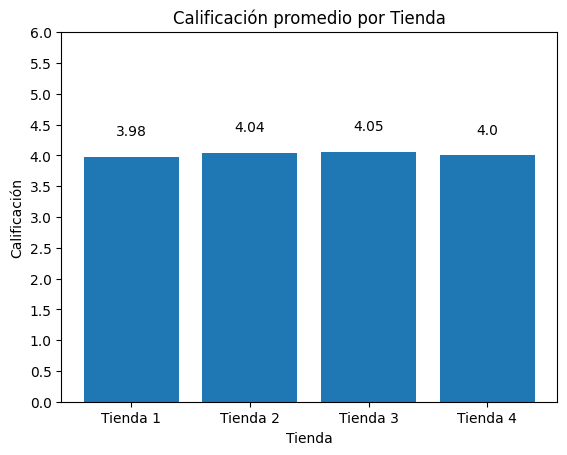

In [86]:
plt.bar(x = nombre_tiendas, height = prom_cal_tienda)

for i, valor in enumerate(prom_cal_tienda):
    plt.text(i, valor + 0.3, str(valor), ha='center', va='bottom', fontsize=10)

plt.title('Calificación promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.yticks(ticks = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
plt.show()

# 4. Productos más y menos vendidos


---- Tienda 1 ----
Menos vendidos:
	Auriculares con micrófono: 33 unidades
	Celular ABXY: 33 unidades
Mas vendidos:
	Microondas: 60 unidades
	TV LED UHD 4K: 60 unidades
	Armario: 60 unidades


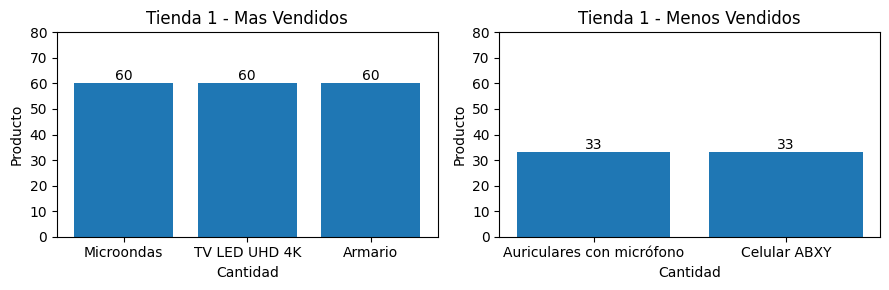


---- Tienda 2 ----
Menos vendidos:
	Juego de mesa: 32 unidades
Mas vendidos:
	Iniciando en programación: 65 unidades


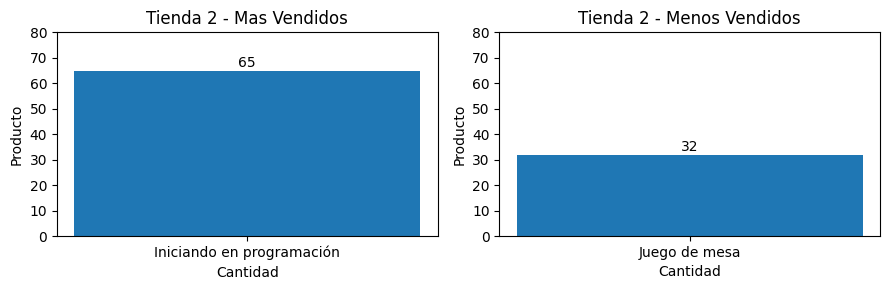


---- Tienda 3 ----
Menos vendidos:
	Bloques de construcción: 35 unidades
Mas vendidos:
	Kit de bancas: 57 unidades


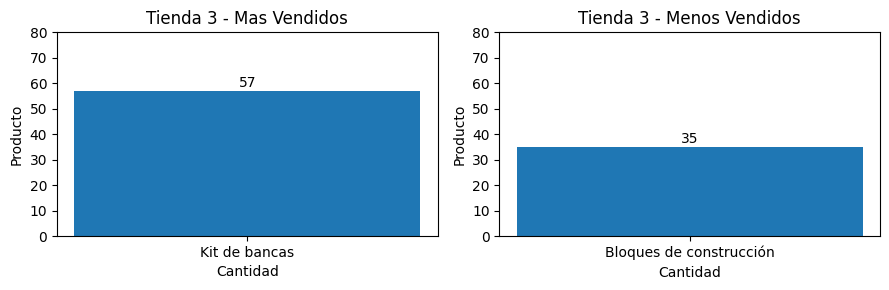


---- Tienda 4 ----
Menos vendidos:
	Guitarra eléctrica: 33 unidades
Mas vendidos:
	Cama box: 62 unidades


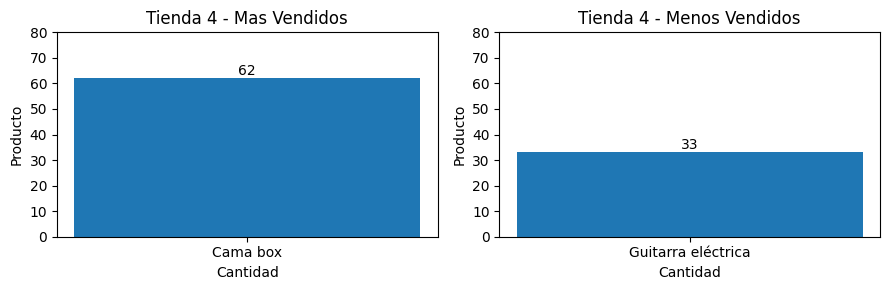

In [103]:
for index, tienda in enumerate(tiendas):
  venta_prod = list(tienda['Producto'])
  lista_prod = list(tienda['Producto'].unique())
  cant_prod = []
  count = max_count = 0
  lista_min = []
  lista_max = []
  lista_prod_min = []
  lista_prod_max = []

  for producto in lista_prod:
    for i in range(len(venta_prod)):
      if venta_prod[i] == producto:
        count += 1
    cant_prod.append([producto, count])
    if max_count < count:
      max_count = count
    min_count = max_count
    for tup in cant_prod:
      if min_count > tup[1]:
        min_count = tup[1]
    count = 0

  print(f'\n---- Tienda {index + 1} ----\nMenos vendidos:')
  for i in cant_prod:
    if i[1] == min_count:
      print(f'\t{i[0]}: {i[1]} unidades')
      lista_min.append(i[1])
      lista_prod_min.append(i[0])
  print(f'Mas vendidos:')
  for i in cant_prod:
    if i[1] == max_count:
      print(f'\t{i[0]}: {i[1]} unidades')
      lista_max.append(i[1])
      lista_prod_max.append(i[0])

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))



  ax1.bar(x = lista_prod_max, height = lista_max)
  for i, valor in enumerate(lista_max):
    ax1.text(i, valor + 0.3, str(valor), ha='center', va='bottom', fontsize=10)
  ax1.set_xticks(lista_prod_max)
  ax1.set_title(f'Tienda {index + 1} - Mas Vendidos')
  ax1.set_yticks(ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80])
  ax1.set_xlabel('Cantidad')
  ax1.set_ylabel('Producto')

  ax2.bar(x=lista_prod_min, height=lista_min)
  for i, valor in enumerate(lista_min):
    ax2.text(i, valor + 0.3, str(valor), ha='center', va='bottom', fontsize=10)
  ax2.set_xticks(lista_prod_min)
  ax2.set_title(f'Tienda {index + 1} - Menos Vendidos')
  ax2.set_yticks(ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80])
  ax2.set_xlabel('Cantidad')
  ax2.set_ylabel('Producto')

  plt.tight_layout()
  plt.show()

# 5. Envío promedio por tienda

In [46]:
envio_prom_tienda = []

for index, tienda in enumerate(tiendas):
  costo_envio = list(tienda['Costo de envío'])
  costo_envio_prom = sum(costo_envio) / len(costo_envio)
  envio_prom_tienda.append(round(costo_envio_prom, 2))
  print(f'Costo de envio promedio Tienda {index + 1}: {round(costo_envio_prom, 2)}')

Costo de envio promedio Tienda 1: 26018.61
Costo de envio promedio Tienda 2: 25216.24
Costo de envio promedio Tienda 3: 24805.68
Costo de envio promedio Tienda 4: 23459.46


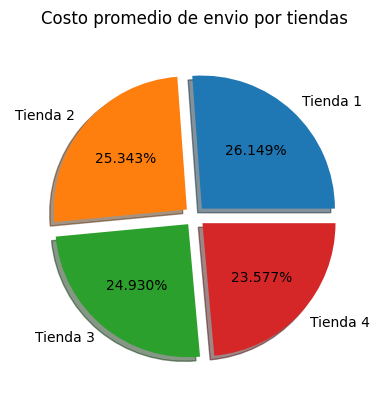

In [57]:
plt.pie(
    x = envio_prom_tienda,
    labels = nombre_tiendas,
    autopct='%1.3f%%',
    shadow = True,
    radius = 0.9,
    explode = [0.07, 0.07, 0.07, 0.07])
plt.title('Costo promedio de envio por tiendas')
plt.show()

# Informe Final

## Introducción

Este informe tiene como objetivo entregar un análisis en detalle del rendimiento de las tiendas del propietario y ayudar en la toma de decisiones informada sobre cuál de las tiendas debe vender para invertir en un nuevo negocio. Para ello, se analizan varios factores clave que afectan el rendimiento de cada tienda: los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y los costos de envío promedio.

A través de la recopilación y análisis de estos datos, se buscará determinar cuál es la tienda que muestra un menor desempeño en comparación con las otras, apoyando la decisión con gráficos que visualicen los resultados de manera clara y objetiva.



## Desarrollo
1. Ingresos Totales de las Tiendas

Los ingresos totales por tienda son un factor fundamental para evaluar el desempeño general de cada una. A continuación, se muestran los ingresos totales de las cuatro tiendas:

| Tienda  | Ingresos Totales (en unidades monetarias) |
|---------|--------------------------------------------|
| Tienda 1 | 1,150,880,400.00                         |
| Tienda 2 | 1,116,343,500.00                         |
| Tienda 3 | 1,098,019,600.00                         |
| Tienda 4 | 1,038,375,700.00                         |

Como podemos observar, la Tienda 4 tiene los ingresos más bajos, lo que podría indicar un desempeño inferior en comparación con las demás.

2. Categorías de Productos Más y Menos Vendidas

La venta de productos en diferentes categorías influye significativamente en el rendimiento general de cada tienda. A continuación, se muestran las categorías más y menos vendidas por cada tienda.

Tienda 1:
* Más vendidas: Muebles, Juguetes, Electrónicos.
* Menos vendidas: Artículos para el hogar.

Tienda 2:
* Más vendidas: Electrónicos, Juguetes.
* Menos vendidas: Juegos de mesa.

Tienda 3:
* Más vendidas: Muebles, Electrónicos, Juguetes.
* Menos vendidas: Electrodomésticos.

Tienda 4:
* Más vendidas: Electrónicos, Juguetes.
* Menos vendidas: Instrumentos musicales.

En términos de productos más vendidos, Tienda 4 muestra una especialización en Electrónicos y Juguetes, al igual que Tienda 2, lo cual puede indicar que estas categorías tienen un mejor rendimiento. Sin embargo, las categorías menos vendidas en Tienda 4, como Instrumentos musicales, podrían estar limitando su potencial.

3. Calificación Promedio por Tienda

Las calificaciones promedio reflejan la satisfacción de los clientes y son cruciales para evaluar el desempeño en términos de servicio y calidad. A continuación, se presentan las calificaciones promedio:

| Tienda  | Calificación Promedio (1-5) |
|---------|----------------------------|
| Tienda 1 | 3.98                       |
| Tienda 2 | 4.04                       |
| Tienda 3 | 4.05                       |
| Tienda 4 | 4.00                       |

Las Tienda 2 y Tienda 3 tienen las mejores calificaciones, lo que sugiere una mayor satisfacción del cliente. La Tienda 1 tiene una calificación algo baja en comparación con las demás, lo que podría ser un indicio de que sus productos o servicios no están cumpliendo con las expectativas de los clientes.

4. Productos Más y Menos Vendidos

Cada tienda tiene productos que destacan por su rendimiento de ventas. A continuación, se muestran los productos más y menos vendidos de cada tienda:

* Tienda 1: Microondas, TV LED UHD 4K, Armario (más vendidos) / Auriculares con micrófono, Celular ABXY (menos vendidos).
* Tienda 2: Iniciando en programación (más vendidos) / Juego de mesa (menos vendidos).
* Tienda 3: Kit de bancas (más vendidos) / Bloques de construcción (menos vendidos).
* Tienda 4: Cama box (más vendidos) / Guitarra eléctrica (menos vendidos).

Es interesante notar que la Tienda 1 tiene productos con un volumen significativo de ventas, como Microondas y TV LED UHD 4K, lo que sugiere que tiene una base sólida de productos bien vendidos. Sin embargo, los productos como Auriculares con micrófono y Celular ABXY muestran un bajo desempeño, lo que podría ser una señal de que algunos artículos no están funcionando bien en esta tienda.

5. Costo de Envío Promedio por Tienda

El costo de envío es un factor importante en la rentabilidad de cada tienda. A continuación se muestran los costos de envío promedio:

| Tienda  | Costo de Envío Promedio |
|---------|------------------------|
| Tienda 1 | 26,018.61               |
| Tienda 2 | 25,216.24               |
| Tienda 3 | 24,805.68               |
| Tienda 4 | 23,459.46               |

El costo de envío más bajo corresponde a Tienda 4, lo cual es una ventaja, ya que reduce el gasto en logística y mejora la rentabilidad. Sin embargo, el menor costo de envío no es suficiente para compensar los ingresos totales más bajos de la tienda.

## Recomendación

A pesar de que Tienda 4 tiene el costo de envío más bajo, presenta los ingresos más bajos y una calificación de cliente algo por debajo de las otras tiendas. Además, aunque tiene buenos productos en categorías clave como Electrónicos y Juguetes, su desempeño general parece no ser tan sólido como el de Tienda 3, que tiene un mejor balance en términos de ingresos, calificaciones y categorías de productos y que ademas, las categorias fuertes de ventas de la Tienda 4, son las mismas que se aprecian en las otras por lo que no se considera un factor decisivo para el analisis.

La recomendación es vender la Tienda 4, ya que, aunque tiene algunas fortalezas (como el costo de envío bajo y algunas categorías de productos bien posicionadas), su desempeño general es el más bajo en términos de ingresos totales y satisfacción del cliente.

El propietario debería considerar invertir en Tienda 3, que tiene un buen desempeño en todas las áreas analizadas, incluyendo ingresos, calificaciones y ventas en categorías clave.